# Test of the full Hamiltonian variational form on 2site lattice

In [1]:
# Set import locations
import os 
import sys
# sys.path.append(os.path.abspath('/Users/ima/Box/GitCode/lattice-models'))

# 0. Standard imports
import matplotlib.pyplot as plt
import numpy as np
# from qiskit.aqua import Operator
import qutip as qt

# 1. Import the lattice class for generating the lattice with respective boundary conditions.
import lattice.lattice as lat
from lattice.operators.qiskit_aqua_operator_utils import *

# 2. Import the wilson fermion operators, states, hamiltonian
import lattice.wilson_fermions as wf

# 3. Set a convenient printing for qiskit.aqua.Operators & Mixed Operators
# def prt_with_output(self):
#     return self.print_operators()
# setattr(Operator, '__repr__', prt_with_output)

padding_value=  1
Log encoding is calculated.
Log encoding is calculated.
Log encoding is calculated.
Log encoding is calculated.


/home/msd/anaconda3/envs/aqua/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/home/msd/anaconda3/envs/aqua/lib/python3.9/site-packages/qiskit/aqua/operators/legacy/op_converter.py:90: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  num_processes=aqua_globals.num_processes)
/home/msd/Documents/CODE/lattice-model/lattice/wilson_fermions/gauss_law.py:156: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if lattice.boundary_cond is not 'periodic' and boundary_cond is None:


In [2]:
from lattice.wilson_fermions.variational_form import WilsonLGT, hopping_term
from lattice.wilson_fermions.states import *

##### Building the Hamiltonian #########
Mass, Hopping & Wilson energy added........
Representation: paulis, qubits: 10, size: 390
chargeoffset -1.0
Gx: Representation: paulis, qubits: 10, size: 6
gauss_regularizer qubits 10
chargeoffset -1
Gx: Representation: paulis, qubits: 10, size: 9
gauss_regularizer qubits 10
chargeoffset -1.0
Gx: Representation: paulis, qubits: 10, size: 6
gauss_regularizer qubits 10
Gauge field flux energy added.
Gauge invariance regulator added.
##### Hamiltonian successfully built #####
##### Building the Hamiltonian #########
Mass, Hopping & Wilson energy added........
Quantum object: dims = [[16, 2, 2, 2, 2, 2, 2], [16, 2, 2, 2, 2, 2, 2]], shape = (1024, 1024), type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -2.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  2.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ... -2.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j

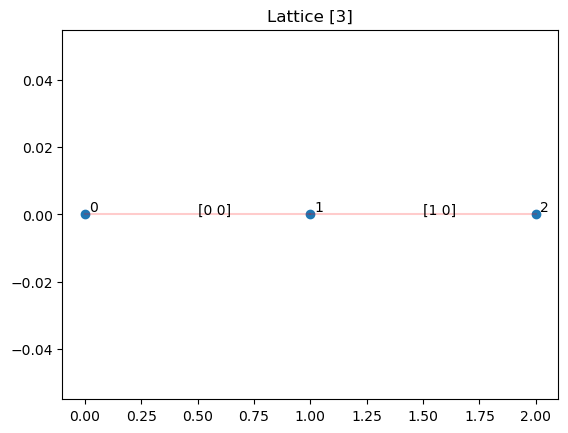

In [55]:
lattice_simplest = lat.SquareLattice([3], bc='closed')

S = 1.
ms = 0.
rep = wf.dirac
params = {
    'm': 1,
    't': 1.,
    'r': 1.,
    'a': 1,
    'e': 1,
    'lam': 0.,
    'S': S }

boundary_cond = {
    (0, 0): ms,
    (lattice_simplest.nsites-1, 0): ms
}

#-----------------------------------------------------------------
hamiltonian = wf.build_hamilton(lattice=lattice_simplest, 
                                rep=rep,
                                params=params, 
                                lam = params['lam'],
                                boundary_cond=boundary_cond,
                                output='qiskit');
Qhamilton,Qgauge_part,Qgauge_regularization,Qmass_hopping_wilson_part = hamiltonian;
Qdiagonal_term , Qhopp_term = Qmass_hopping_wilson_part;

Qgauge_part.to_file('/home/msd/Documents/Qgauge_part.txt')
Qdiagonal_term.to_file('/home/msd/Documents/Qdiagonal_term.txt')
Qhopp_term.to_file('/home/msd/Documents/Qhopp_term.txt')
Qgauge_regularization.to_file('/home/msd/Documents/Qgauge_regularization.txt')

hamilton_qt = wf.build_hamilton(lattice=lattice_simplest, 
                                rep=rep, 
                                params=params, 
                                lam = params['lam'],
                                boundary_cond=boundary_cond,
                                output='qutip');

hamilton,gauge_part,gauge_regularization,mass_hopping_wilson_part = hamilton_qt;
diagonal_term , hopp_term = mass_hopping_wilson_part;

lattice_simplest.plot_2d();

In [32]:
print((-gauge_regularization).groundstate()[0])
np.testing.assert_allclose(np.diag(gauge_regularization.data.diagonal())-np.array(gauge_regularization),0)

SummedOp([
  27.5 * IIIIIIIIII,
  5j * IIIIIIIIIZ,
  5j * IIIIIIIIZI,
  12.5 * IIIZIIIIII,
  -12.5 * IIZIIIIIII,
  2.5 * IIZZIIIIII,
  -10.0 * IIIIIIIIZZ,
  -5j * IIIZIIIIIZ,
  5j * IIZIIIIIIZ,
  15j * IIZZIIIIIZ,
  -5j * IIIZIIIIZI,
  5j * IIZIIIIIZI,
  15j * IIZZIIIIZI,
  -10.0 * IIIIIIZZII,
  5j * IIIZIIIZII,
  -5j * IIZIIIIZII,
  -15j * IIZZIIIZII,
  -5j * IZIIIIIZII,
  5j * ZIIIIIIZII,
  15j * ZZIIIIIZII,
  5j * IIIZIIZIII,
  -5j * IIZIIIZIII,
  -15j * IIZZIIZIII,
  -5j * IZIIIIZIII,
  5j * ZIIIIIZIII,
  15j * ZZIIIIZIII,
  -2.5 * IZIZIIIIII,
  2.5 * ZIIZIIIIII,
  7.5 * ZZIZIIIIII,
  2.5 * IZZIIIIIII,
  -2.5 * ZIZIIIIIII,
  -7.5 * ZZZIIIIIII,
  7.5 * IZZZIIIIII,
  -7.5 * ZIZZIIIIII,
  -22.5 * ZZZZIIIIII,
  2.5 * ZZIIIIIIII,
  -12.5 * ZIIIIIIIII,
  12.5 * IZIIIIIIII,
  -5j * IIIIIZIIII,
  -5j * IIIIZIIIII,
  -10.0 * IIIIZZIIII,
  5j * IZIIIZIIII,
  -5j * ZIIIIZIIII,
  -15j * ZZIIIZIIII,
  5j * IZIIZIIIII,
  -5j * ZIIIZIIIII,
  -15j * ZZIIZIIIII
])
-340.0


In [56]:
assert hamilton == gauge_part + gauge_regularization + diagonal_term + hopp_term
print('ground state energy (qutip)')
E0, ground_state = (hamilton).groundstate()
print(E0)
print('regul',(gauge_regularization*ground_state).data)

ground state energy (qutip)
-6.221933404721247
regul 


In [5]:
#This is the mass term
print(Qdiagonal_term.to_opflow())
print('ground state:',(diagonal_term).groundstate()[0])
print('ground state regularized:',(diagonal_term+gauge_regularization).groundstate()[0])

SummedOp([
  -1j * IIIIIIIIIZ,
  1j * IIIIIIIIZI,
  -1j * IIIIIIIZII,
  1j * IIIIIIZIII,
  -1j * IIIIIZIIII,
  1j * IIIIZIIIII
])
ground state: -6.0
ground state regularized: -6.0


In [6]:
#This is the hopping term
print(Qhopp_term.to_opflow())
print('ground state:',(hopp_term).groundstate()[0])
print('ground state regularized:',(hopp_term+gauge_regularization).groundstate()[0])

SummedOp([
  -0.044194173824159216 * IIIIIIIXZY,
  0.0 * IIIXIIIXZY,
  0.044194173824159216 * IIIZIIIXZY,
  0.0 * IIXXIIIXZY,
  0.0 * IIYYIIIXZY,
  0.044194173824159216 * IIZIIIIXZY,
  0.0 * IIZXIIIXZY,
  -0.044194173824159216 * IIZZIIIXZY,
  -0.0625 * IIIYIIIXZY,
  0.0625 * IIXYIIIXZY,
  -0.0625 * IIYXIIIXZY,
  -0.0625 * IIZYIIIXZY,
  0.044194173824159216 * IIIIIIIYZY,
  0.0625 * IIIXIIIYZY,
  -0.044194173824159216 * IIIZIIIYZY,
  0.0625 * IIXXIIIYZY,
  0.0625 * IIYYIIIYZY,
  -0.044194173824159216 * IIZIIIIYZY,
  0.0625 * IIZXIIIYZY,
  0.044194173824159216 * IIZZIIIYZY,
  0.0 * IIIYIIIYZY,
  0.0 * IIXYIIIYZY,
  0.0 * IIYXIIIYZY,
  0.0 * IIZYIIIYZY,
  0.044194173824159216 * IIIIIIIXZX,
  0.0625 * IIIXIIIXZX,
  -0.044194173824159216 * IIIZIIIXZX,
  0.0625 * IIXXIIIXZX,
  0.0625 * IIYYIIIXZX,
  -0.044194173824159216 * IIZIIIIXZX,
  0.0625 * IIZXIIIXZX,
  0.044194173824159216 * IIZZIIIXZX,
  0.0 * IIIYIIIXZX,
  0.0 * IIXYIIIXZX,
  0.0 * IIYXIIIXZX,
  0.0 * IIZYIIIXZX,
  0.0441941738241592

In [7]:
#This is what I call link term + plaquette term
print(Qgauge_part.to_opflow())
print('ground state:',(gauge_part).groundstate()[0])
print('ground state regularized:',(gauge_part+gauge_regularization).groundstate()[0])

SummedOp([
  0.75 * IIIIIIIIII,
  0.125 * IIIZIIIIII,
  -0.125 * IIZIIIIIII,
  0.125 * IIZZIIIIII,
  0.125 * IZIIIIIIII,
  -0.125 * ZIIIIIIIII,
  0.125 * ZZIIIIIIII
])
ground state: 0.0
ground state regularized: 0.0


True

In [17]:
print(Qgauge_regularization.to_opflow())
print((-gauge_regularization).groundstate()[0])
np.testing.assert_allclose(np.diag(gauge_regularization.data.diagonal())-np.array(gauge_regularization),0)

SummedOp([
  27.5 * IIIIIIIIII,
  5j * IIIIIIIIIZ,
  5j * IIIIIIIIZI,
  12.5 * IIIZIIIIII,
  -12.5 * IIZIIIIIII,
  2.5 * IIZZIIIIII,
  -10.0 * IIIIIIIIZZ,
  -5j * IIIZIIIIIZ,
  5j * IIZIIIIIIZ,
  15j * IIZZIIIIIZ,
  -5j * IIIZIIIIZI,
  5j * IIZIIIIIZI,
  15j * IIZZIIIIZI,
  -10.0 * IIIIIIZZII,
  5j * IIIZIIIZII,
  -5j * IIZIIIIZII,
  -15j * IIZZIIIZII,
  -5j * IZIIIIIZII,
  5j * ZIIIIIIZII,
  15j * ZZIIIIIZII,
  5j * IIIZIIZIII,
  -5j * IIZIIIZIII,
  -15j * IIZZIIZIII,
  -5j * IZIIIIZIII,
  5j * ZIIIIIZIII,
  15j * ZZIIIIZIII,
  -2.5 * IZIZIIIIII,
  2.5 * ZIIZIIIIII,
  7.5 * ZZIZIIIIII,
  2.5 * IZZIIIIIII,
  -2.5 * ZIZIIIIIII,
  -7.5 * ZZZIIIIIII,
  7.5 * IZZZIIIIII,
  -7.5 * ZIZZIIIIII,
  -22.5 * ZZZZIIIIII,
  2.5 * ZZIIIIIIII,
  -12.5 * ZIIIIIIIII,
  12.5 * IZIIIIIIII,
  -5j * IIIIIZIIII,
  -5j * IIIIZIIIII,
  -10.0 * IIIIZZIIII,
  5j * IZIIIZIIII,
  -5j * ZIIIIZIIII,
  -15j * ZZIIIZIIII,
  5j * IZIIZIIIII,
  -5j * ZIIIZIIIII,
  -15j * ZZIIZIIIII
])
-340.0


In [44]:
print(diagonal_term)
print('shape is',diagonal_term.data.shape)
print(diagonal_term+gauge_regularization)
print('ground state energy (qutip)')
E0, ground_state = (diagonal_term+gauge_regularization).groundstate()
print(E0)



Quantum object: dims = [[16, 2, 2, 2, 2, 2, 2], [16, 2, 2, 2, 2, 2, 2]], shape = (1024, 1024), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. -2.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  0.  0.]
 [ 0.  0.  0. ...  0.  2.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
shape is (1024, 1024)
Quantum object: dims = [[16, 2, 2, 2, 2, 2, 2], [16, 2, 2, 2, 2, 2, 2]], shape = (1024, 1024), type = oper, isherm = True
Qobj data =
[[100.   0.   0. ...   0.   0.   0.]
 [  0. 118.   0. ...   0.   0.   0.]
 [  0.   0. 122. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  38.   0.   0.]
 [  0.   0.   0. ...   0.  42.   0.]
 [  0.   0.   0. ...   0.   0. 100.]]
ground state energy (qutip)
-6.0


In [11]:
diagonal_term.data.diagonal()

array([ 0.+0.j, -2.+0.j,  2.+0.j, ..., -2.+0.j,  2.+0.j,  0.+0.j])

In [12]:
print(hopp_term)
print('ground state energy (qutip)')
E0, ground_state = (hopp_term+gauge_regularization).groundstate()
print(E0)

Quantum object: dims = [[16, 2, 2, 2, 2, 2, 2], [16, 2, 2, 2, 2, 2, 2]], shape = (1024, 1024), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]
ground state energy (qutip)
-2.000000000000018


In [13]:
print(gauge_part)
print(hamiltonian[1].to_dict())
print('ground state energy (qutip)')
E0, ground_state = (gauge_part).groundstate()
print(E0)

Quantum object: dims = [[16, 2, 2, 2, 2, 2, 2], [16, 2, 2, 2, 2, 2, 2]], shape = (1024, 1024), type = oper, isherm = True
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
{'paulis': [{'label': 'IIIIIIIIII', 'coeff': {'real': 0.75, 'imag': 0.0}}, {'label': 'IIIZIIIIII', 'coeff': {'real': 0.125, 'imag': 0.0}}, {'label': 'IIZIIIIIII', 'coeff': {'real': -0.125, 'imag': 0.0}}, {'label': 'IIZZIIIIII', 'coeff': {'real': 0.125, 'imag': 0.0}}, {'label': 'IZIIIIIIII', 'coeff': {'real': 0.125, 'imag': 0.0}}, {'label': 'ZIIIIIIIII', 'coeff': {'real': -0.125, 'imag': 0.0}}, {'label': 'ZZIIIIIIII', 'coeff': {'real': 0.125, 'imag': 0.0}}]}
ground state energy (qutip)
0.0


In [43]:
Qhamilton.to_file('/home/msd/Documents/Qhamilton.txt')

In [64]:
from lattice.wilson_fermions.hamiltonian import hamilton_hopp_mass_wilson


diag, hopp = hamilton_hopp_mass_wilson(lattice=lattice_simplest,rep=rep,params=params,output='qiskit')
hopp.to_dict()

{'paulis': [{'label': 'IIIIIIIXZY',
   'coeff': {'real': -0.044194173824159216, 'imag': 0.0}},
  {'label': 'IIIXIIIXZY', 'coeff': {'real': 0.0, 'imag': 0.0}},
  {'label': 'IIIZIIIXZY',
   'coeff': {'real': 0.044194173824159216, 'imag': 0.0}},
  {'label': 'IIXXIIIXZY', 'coeff': {'real': 0.0, 'imag': 0.0}},
  {'label': 'IIYYIIIXZY', 'coeff': {'real': 0.0, 'imag': 0.0}},
  {'label': 'IIZIIIIXZY',
   'coeff': {'real': 0.044194173824159216, 'imag': 0.0}},
  {'label': 'IIZXIIIXZY', 'coeff': {'real': 0.0, 'imag': 0.0}},
  {'label': 'IIZZIIIXZY',
   'coeff': {'real': -0.044194173824159216, 'imag': 0.0}},
  {'label': 'IIIYIIIXZY', 'coeff': {'real': -0.0625, 'imag': 0.0}},
  {'label': 'IIXYIIIXZY', 'coeff': {'real': 0.0625, 'imag': 0.0}},
  {'label': 'IIYXIIIXZY', 'coeff': {'real': -0.0625, 'imag': 0.0}},
  {'label': 'IIZYIIIXZY', 'coeff': {'real': -0.0625, 'imag': 0.0}},
  {'label': 'IIIIIIIYZY',
   'coeff': {'real': 0.044194173824159216, 'imag': 0.0}},
  {'label': 'IIIXIIIYZY', 'coeff': {'real

In [14]:
if S > 0:
    init_state = qt.tensor([wf.construct_dirac_state('.'*lattice_simplest.nsites), 
                            wf.spin_register_state([ms]*lattice_simplest.nedges, S)][::-1])
else: 
    init_state = wf.construct_dirac_state('.'*lattice_simplest.nsites)

# bare vacuum energy
print('bare vacuum energy')
print(qt.expect(hamilton_qt, init_state))

print('ground state energy (qutip)')
E0, ground_state = hamilton_qt.groundstate()
print(E0)

print('ground state energy (qiskit)')
from qiskit.aqua.algorithms.classical.exact_eigen_solver.exact_eigen_solver import ExactEigensolver
solver = ExactEigensolver(hamiltonian)
gs_solution = solver.run()
print(gs_solution['energies'][0])

bare vacuum energy


TypeError: Arguments must be quantum objects or eseries

## Setting up the variational form:

In [ ]:
def zterm(pos, comp, lattice, S):
    assert 0 <= pos <= lattice.nsites-1, 'pos out of bounds for lattice of size {}'.format(lattice.nsites)
    dim_S = int(2*S+1)
    ops = [qt.identity(2)]*(2*pos+comp) \
            + [qt.sigmaz()]  \
            + [qt.identity(2)]*(2*lattice.nsites - (2*pos+comp) - 1) \
            + [qt.identity(dim_S)]*lattice.nedges
    return qt.tensor(ops[::-1])

In [ ]:
qutip_hoppers = [hopping_term(edge, lattice_simplest, S, rep, output='qutip')
                for edge in lattice_simplest.edges]              

In [ ]:
hopp1 = lambda theta: (1j*theta*qutip_hoppers[0]).expm()
#hopp2 = lambda theta: (1j*theta*qutip_hoppers[1]).expm()
z0 = lambda phi: (1j*phi*zterm(0,0, lattice_simplest, S)).expm()
z1 = lambda phi: (1j*phi*zterm(0,1, lattice_simplest, S)).expm()
z2 = lambda phi: (1j*phi*zterm(1,0, lattice_simplest, S)).expm()
z3 = lambda phi: (1j*phi*zterm(1,1, lattice_simplest, S)).expm()

In [ ]:
# set up the variational state
#var_state = lambda lam1, lam2: hopp2(lam2) * hopp1(lam1) * init_state
var_state = lambda lam: z0(lam[0]) * z1(lam[1]) * z2(lam[2]) \
                        * z3(lam[3]) * hopp1(lam[4]) * init_state

## Try a classical optimization via scipyto see if there are better param. combination 

Result: It seems there are not for the given variational form that is built up only from the kinetic terms in the Hamiltonian.

In [ ]:
from scipy.optimize import minimize

In [ ]:
# set up the variational state
#var_state = lambda lam1, lam2: hopp2(lam2) * hopp1(lam1) * init_state
var_state = lambda lam: z0(lam[0]) * z1(lam[1]) * z2(lam[2]) \
                        * z3(lam[3]) * hopp1(lam[4]) * init_state

energy_expectation = lambda p: qt.expect(hamilton_qt, var_state(p))

### with depth 1

In [ ]:
Nfeval = 1
param_list = [init]
init = np.random.rand(5)*np.pi

def callbackF(Xi):
    global Nfeval
    param_list.append(Xi)
    Nfeval += 1

popt = minimize(fun = energy_expectation, 
                x0 = init, 
                callback = callbackF)
print('fun: \t{}\nnfev: \t{}\nnit: \t{}\nx0: \t{}\nxopt: \t{}\n'.format(popt['fun'],
                                                                           popt['nfev'],
                                                                           popt['nit'],
                                                                           init,
                                                                           popt['x']))

Ediff = (abs(gs_solution['eigvals'] - popt['fun']) / abs(gs_solution['eigvals'])[0])[0]

print('Init energy: \t{}'.format(energy_expectation(init)))
print('GS energy: \t{}'.format(E0))
print('Var energy: \t{}'.format(popt['fun']))
print('relative_diff = {:.3f}%'.format(Ediff*100))

fun: 	-5.32589334507152
nfev: 	84
nit: 	8
x0: 	[1.82174727 0.96331784 0.16774063 1.73406327 2.271961  ]
xopt: 	[1.38520544 0.95822829 0.17283001 2.17060502 2.97940363]

Init energy: 	0.510661138204087
GS energy: 	-5.3261338967601795
Var energy: 	-5.32589334507152
relative_diff = 0.005%


In [ ]:
state_decompose_dirac(var_state(popt['x']), lattice_simplest.nsites, lattice_simplest.nedges, S, thres=0)

([('..', [0.0]), ('ap', [-1.0]), ('pa', [1.0]), ('bb', [0.0])],
 array([9.48529066e-01, 2.53955032e-02, 2.53955032e-02, 6.79928117e-04]))

In [ ]:
state_decompose_dirac(ground_state, lattice_simplest.nsites, lattice_simplest.nedges, S, thres=0)

([('..', [0.0]), ('pa', [1.0]), ('ap', [-1.0]), ('bb', [0.0])],
 array([9.48605352e-01, 2.52242033e-02, 2.52242033e-02, 9.46241400e-04]))

In [ ]:
Gx = lambda x: wf.gauge_operator(x, lattice_simplest, params, boundary_cond=boundary_cond)
qx = lambda x: site_charge(x, lattice_simplest, S=S).to_qubit_operator(output='qutip')
Qtot= wf.total_charge(lattice_simplest, S=S).to_qubit_operator(output='qutip')
Mtot= wf.total_mass(lattice_simplest, S=S).to_qubit_operator(output='qutip')
reg = wf.gauss_law_regularizer(lattice_simplest, params, lam=100., boundary_cond=boundary_cond)

In [ ]:
# look at the energy as a function of the parameter
param_list = np.array(param_list)

var_states = np.array([var_state(lam) for lam in param_list], dtype=qt.Qobj)

energies = np.array([qt.expect(hamilton_qt, state) for state in var_states])
#left_charge = np.array([qt.expect(qx([0]), state)-1 for state in var_states])
#mid_charge = np.array([qt.expect(qx([1]), state)-1 for state in var_states])
#right_charge = np.array([qt.expect(qx([2]), state)-1 for state in var_states])

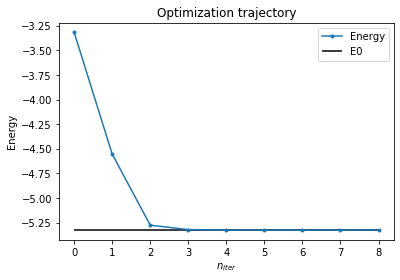

In [ ]:
plt.plot(energies, '.-', label='Energy')
plt.hlines(E0, 0, len(energies)-1, label='E0')
plt.legend()
plt.ylabel('Energy')
plt.title('Optimization trajectory')
plt.xlabel(r'$n_{iter}$');

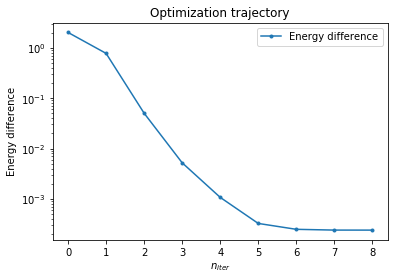

In [ ]:
plt.semilogy(energies-E0, '.-', label='Energy difference')
plt.legend()
plt.ylabel('Energy difference')
plt.title('Optimization trajectory')
plt.xlabel(r'$n_{iter}$');

In [ ]:
# Check that the state var_state is indeed gauge invariant and stays in the gauss law satisfying sector
np.array([qt.expect(reg, state) for state in var_states])

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Check that the total charge is conserved throughout the optimization process
np.array([qt.expect(Qtot-lattice_simplest.nsites, state) for state in var_states])

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# While the total particle number indeed does not need to be conserved. 
np.array([qt.expect(Mtot, state) + lattice_simplest.nsites for state in var_states])

array([0.67239266, 0.04223576, 0.04344558, 0.08170292, 0.09784842,
       0.10496097, 0.10481408, 0.1042039 , 0.10430173])

In [ ]:
gs_overlap = np.array([ground_state.overlap(state) for state in var_states])

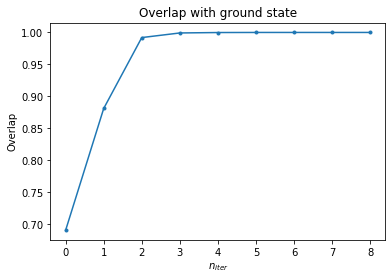

In [ ]:
plt.plot(abs(gs_overlap)**2, '.-')
plt.ylabel('Overlap')
plt.xlabel(r'$n_{iter}$');
plt.title('Overlap with ground state');

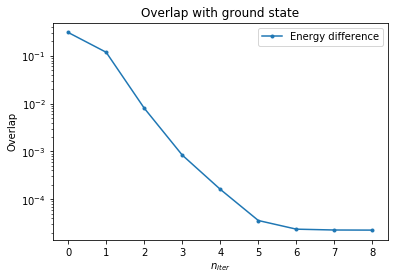

In [ ]:
plt.semilogy(1.-abs(gs_overlap)**2, '.-', label='Energy difference')
plt.legend()
plt.ylabel('Overlap')
plt.xlabel(r'$n_{iter}$');
plt.title('Overlap with ground state');

## with depth 2

In [ ]:
# set up the variational state
#var_state = lambda lam1, lam2: hopp2(lam2) * hopp1(lam1) * init_state
var_state2 = lambda lam: z0(lam[0]) * z1(lam[1]) * z2(lam[2]) \
                        * z3(lam[3]) * hopp1(lam[4]) \
                        * z0(lam[5]) * z1(lam[6]) * z2(lam[7]) \
                        * z3(lam[8]) * hopp1(lam[9]) * init_state

energy_expectation2 = lambda p: qt.expect(hamilton_qt, var_state(p))

In [ ]:
Nfeval = 1
param_list = [init]
init2 = np.random.rand(10)*np.pi

def callbackF(Xi):
    global Nfeval
    param_list.append(Xi)
    Nfeval += 1

popt2 = minimize(fun = energy_expectation2, 
                x0 = init2, 
                callback = callbackF)
print('fun: \t{}\nnfev: \t{}\nnit: \t{}\nx0: \t{}\nxopt: \t{}\n'.format(popt2['fun'],
                                                                           popt2['nfev'],
                                                                           popt2['nit'],
                                                                           init2,
                                                                           popt2['x']))

Ediff2 = (abs(gs_solution['eigvals'] - popt['fun']) / abs(gs_solution['eigvals'])[0])[0]

print('Init energy: \t{}'.format(energy_expectation2(init2)))
print('GS energy: \t{}'.format(E0))
print('Var energy: \t{}'.format(popt2['fun']))
print('relative_diff = {:.3f}%'.format(Ediff2*100))

fun: 	-5.3258933450739585
nfev: 	156
nit: 	11
x0: 	[0.52736816 1.63627583 2.70368512 1.6769471  0.99825245 1.1230265
 2.53207336 1.2030252  0.91833001 1.18307594]
xopt: 	[-0.07594007  1.77728138  2.56267951  2.28025447  0.16218933  1.1230265
  2.53207336  1.2030252   0.91833001  1.18307594]

Init energy: 	2.389537183137922
GS energy: 	-5.3261338967601795
Var energy: 	-5.3258933450739585
relative_diff = 0.005%
